In [1]:
!pip install -U fortran-magic

In [2]:
%load_ext fortranmagic

/usr/local/lib/python3.7/dist-packages/fortranmagic.py:147: UserWarning: get_ipython_cache_dir has moved to the IPython.paths module since IPython 4.0.
  self._lib_dir = os.path.join(get_ipython_cache_dir(), 'fortran')


In [3]:
import py_compile

In [4]:
%matplotlib inline
%reload_ext fortranmagic

import sys; sys.path.append('..')

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

mpl.rc('figure', figsize=(12, 7))

ran_the_first_cell = True

jan2017 = pd.to_datetime(['2017-01-03 00:00:00+00:00',
 '2017-01-04 00:00:00+00:00',
 '2017-01-05 00:00:00+00:00',
 '2017-01-06 00:00:00+00:00',
 '2017-01-09 00:00:00+00:00',
 '2017-01-10 00:00:00+00:00',
 '2017-01-11 00:00:00+00:00',
 '2017-01-12 00:00:00+00:00',
 '2017-01-13 00:00:00+00:00',
 '2017-01-17 00:00:00+00:00',
 '2017-01-18 00:00:00+00:00',
 '2017-01-19 00:00:00+00:00',
 '2017-01-20 00:00:00+00:00',
 '2017-01-23 00:00:00+00:00',
 '2017-01-24 00:00:00+00:00',
 '2017-01-25 00:00:00+00:00',
 '2017-01-26 00:00:00+00:00',
 '2017-01-27 00:00:00+00:00',
 '2017-01-30 00:00:00+00:00',
 '2017-01-31 00:00:00+00:00',
 '2017-02-01 00:00:00+00:00'])
calendar = jan2017.values.astype('datetime64[D]')

event_dates = pd.to_datetime(['2017-01-06 00:00:00+00:00', 
                             '2017-01-07 00:00:00+00:00', 
                             '2017-01-08 00:00:00+00:00']).values.astype('datetime64[D]')
event_values = np.array([10, 15, 20])

/usr/local/lib/python3.7/dist-packages/fortranmagic.py:147: UserWarning: get_ipython_cache_dir has moved to the IPython.paths module since IPython 4.0.
  self._lib_dir = os.path.join(get_ipython_cache_dir(), 'fortran')


<center>
  <h1>The PyData Toolbox</h1>
  <h3>Scott Sanderson (Twitter: @scottbsanderson, GitHub: ssanderson)</h3>
  <h3><a href="https://github.com/ssanderson/pydata-toolbox">https://github.com/ssanderson/pydata-toolbox</a></h3>
</center>

# About Me:

<img src="images/me.jpg" alt="Drawing" style="width: 300px;"/>

- Senior Engineer at [Quantopian](www.quantopian.com)
- Background in Mathematics and Philosophy
- **Twitter:** [@scottbsanderson](https://twitter.com/scottbsanderson)
- **GitHub:** [ssanderson](github.com/ssanderson)

## Outline

- Built-in Data Structures
- Numpy `array`
- Pandas `Series`/`DataFrame`
- Plotting and "Real-World" Analyses

# Data Structures

> Rule 5. Data dominates. If you've chosen the right data structures and organized things well, the algorithms
will almost always be self-evident. Data structures, not algorithms, are central to programming.

- *Notes on Programming in C*, by Rob Pike.

# Lists

In [ ]:
assert ran_the_first_cell, "Oh noes!"

**My own example 1**

In [ ]:
assert ran_the_first_cell, "It works!"

In [ ]:
l = [1, 'two', 3.0, 4, 5.0, "six"]
l

[1, 'two', 3.0, 4, 5.0, 'six']

**My own example 2**

In [ ]:
list1 = [1, 'dos', 3.0, 4, 5.0, "seis"]
list1

[1, 'dos', 3.0, 4, 5.0, 'seis']

In [ ]:
# Lists can be indexed like C-style arrays.
first = l[0]
second = l[1]
print("first:", first)
print("second:", second)

first: 1
second: two


**My own example 3**

In [ ]:
# Lists can be indexed like C-style arrays.
first = list1[0]
second = list1[1]
print("first:", first)
print("second:", second)

first: 1
second: dos


In [ ]:
# Negative indexing gives elements relative to the end of the list.
last = l[-1]
penultimate = l[-2]
print("last:", last)
print("second to last:", penultimate)

last: six
second to last: 5.0


**My own example 4**

In [ ]:
# Negative indexing gives elements relative to the end of the list.
last = list1[-1]
penultimate = list1[-2]
print("last:", last)
print("second to last:", penultimate)

last: seis
second to last: 5.0


In [ ]:
# Lists can also be sliced, which makes a copy of elements between 
# start (inclusive) and stop (exclusive)
sublist = l[1:3]
sublist

['two', 3.0]

**My own example 5**

In [ ]:
# Lists can also be sliced, which makes a copy of elements between 
# start (inclusive) and stop (exclusive)
sublist = list1[2:4]
sublist

[3.0, 4]

In [ ]:
# l[:N] is equivalent to l[0:N].
first_three = l[:3]
first_three

[1, 'two', 3.0]

**My own example 6**

In [ ]:
# l[:N] is equivalent to l[0:N].
first_four = list1[:4]
first_four

[1, 'dos', 3.0, 4]

In [ ]:
# l[3:] is equivalent to l[3:len(l)].
after_three = l[3:]
after_three

[4, 5.0, 'six']

**My own example 7**

In [ ]:
# l[3:] is equivalent to l[3:len(l)].
after_four = list1[4:]
after_four

[5.0, 'seis']

In [ ]:
# There's also a third parameter, "step", which gets every Nth element.
l = ['a', 'b', 'c', 'd', 'e', 'f', 'g','h']
l[1:7:2]

['b', 'd', 'f']

**My own example 8**

In [ ]:
# There's also a third parameter, "step", which gets every Nth element.
list2 = ['a', 'b', 'c', 'd', 'e', 'f', 'g','h']
list2[2:9:3]

['c', 'f']

In [ ]:
# This is a cute way to reverse a list.
l[::-1]

['h', 'g', 'f', 'e', 'd', 'c', 'b', 'a']

**My own example 9**

In [ ]:
# This is a cute way to reverse a list.
list2[::-1]

['h', 'g', 'f', 'e', 'd', 'c', 'b', 'a']

In [ ]:
# Lists can be grown efficiently (in O(1) amortized time).
l = [1, 2, 3, 4, 5]
print("Before:", l)
l.append('six')
print("After:", l)

Before: [1, 2, 3, 4, 5]
After: [1, 2, 3, 4, 5, 'six']


**My own example 10**

In [ ]:
# Lists can be grown efficiently (in O(1) amortized time).
list3 = [10, 20, 30, 40, 50]
print("Before:", list3)
list3.append('six')
print("After:", list3)

Before: [10, 20, 30, 40, 50]
After: [10, 20, 30, 40, 50, 'six']


In [ ]:
# Comprehensions let us perform elementwise computations.
l = [1, 2, 3, 4, 5]
[x * 2 for x in l]

[2, 4, 6, 8, 10]

**My own example 11**

In [ ]:
# Comprehensions let us perform elementwise computations.
list4 = [1, 2, 3, 4, 5]
[x * 2 for x in list4]

[2, 4, 6, 8, 10]

## Review: Python Lists

- Zero-indexed sequence of arbitrary Python values.
- Slicing syntax: `l[start:stop:step]` copies elements at regular intervals from `start` to `stop`.
- Efficient (`O(1)`) appends and removes from end.
- Comprehension syntax: `[f(x) for x in l if cond(x)]`.

# Dictionaries

In [ ]:
# Dictionaries are key-value mappings.
philosophers = {'David': 'Hume', 'Immanuel': 'Kant', 'Bertrand': 'Russell'}
philosophers

{'Bertrand': 'Russell', 'David': 'Hume', 'Immanuel': 'Kant'}

**My own example 12**

In [ ]:
philosophers = {'Andres': 'Pitagoras', 'Santiago': 'Kant', 'Manuela': 'Russell'}
philosophers

{'Andres': 'Pitagoras', 'Santiago': 'Kant', 'Manuela': 'Russell'}

In [ ]:
# Like lists, dictionaries are size-mutable.
philosophers['Ludwig'] = 'Wittgenstein'
philosophers

{'Bertrand': 'Russell',
 'David': 'Hume',
 'Immanuel': 'Kant',
 'Ludwig': 'Wittgenstein'}

**My own example 13**

In [ ]:
# Like lists, dictionaries are size-mutable.
philosophers['Daniel'] = 'Nielsen'
philosophers

{'Andres': 'Pitagoras',
 'Santiago': 'Kant',
 'Manuela': 'Russell',
 'Daniel': 'Nielsen'}

In [ ]:
del philosophers['David']
philosophers

{'Bertrand': 'Russell', 'Immanuel': 'Kant', 'Ludwig': 'Wittgenstein'}

**My own example 14**

In [ ]:
del philosophers['Daniel']
philosophers

{'Andres': 'Pitagoras', 'Santiago': 'Kant', 'Manuela': 'Russell'}

In [ ]:
# No slicing.
philosophers['Bertrand':'Immanuel']

TypeError: unhashable type: 'slice'

**My own example 15**

In [ ]:
# No slicing.
philosophers['Andres':'Manuela']

TypeError: unhashable type: 'slice'

## Review: Python Dictionaries

- Unordered key-value mapping from (almost) arbitrary keys to arbitrary values.
- Efficient (`O(1)`) lookup, insertion, and deletion.
- No slicing (would require a notion of order).

<center><img src="images/pacino.gif" alt="Drawing" style="width: 100%;"/></center>


In [ ]:
# Suppose we have some matrices...
a = [[1, 2, 3],
     [2, 3, 4],
     [5, 6, 7],
     [1, 1, 1]]

b = [[1, 2, 3, 4],
     [2, 3, 4, 5]]

**My own example 16**

In [ ]:
# Suppose we have some matrices...
A = [[1, 2, 3],
     [4, 5, 6],
     [7, 8, 9],
     [10, 11, 12]]

B = [[1, 2, 3],
     [4, 5, 6],
     [7, 8, 9],
     [10, 11, 12]]

In [ ]:
def matmul(A, B):
    """Multiply matrix A by matrix B."""
    rows_out = len(A)
    cols_out = len(B[0])
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]
    
    for i in range(rows_out):
        for j in range(cols_out):
            for k in range(len(B)):
                out[i][j] += A[i][k] * B[k][j]
    return out

**My own example 17**

In [ ]:
def matsum(A, B):
    """Multiply matrix A by matrix B."""
    rows_out = len(A)
    cols_out = len(B[0])
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]
    
    for i in range(rows_out):
        for j in range(cols_out):
            out[i][j] += A[i][j] + B[i][j]
    return out

<center><img src="images/gross.gif" alt="Drawing" style="width: 50%;"/></center>


In [ ]:
%%time

matmul(a, b)

Wall time: 0 ns


[[11, 14, 17, 20], [29, 38, 47, 56], [47, 62, 77, 92], [65, 86, 107, 128]]

**My own example 18**

In [ ]:
%%time

matsum(A, B)

Wall time: 0 ns


[[2, 4, 6], [8, 10, 12], [14, 16, 18], [20, 22, 24]]

In [ ]:
import random
def random_matrix(m, n):
    out = []
    for row in range(m):
        out.append([random.random() for _ in range(n)])
    return out

randm = random_matrix(2, 3)
randm

[[0.1284400577047189, 0.7430538602191037, 0.5982267683657111],
 [0.15040193996829998, 0.37133534561680825, 0.9791613789073683]]

**My own example 19**

In [ ]:
import random
def random_matrix(m, n):
    out = []
    for row in range(m):
        out.append([random.random() for _ in range(n)])
    return out

randm = random_matrix(5, 7)
randm

[[0.13223082733983715,
  0.32136079976104115,
  0.08136202653609803,
  0.5652838972644294,
  0.0542682789611757,
  0.15589112268872496,
  0.3945444996987165],
 [0.41714553907321794,
  0.09989050868403693,
  0.823639015311683,
  0.1600877235549205,
  0.587353364784076,
  0.6561590744893888,
  0.23788256112249417],
 [0.10274872611229902,
  0.390656927653537,
  0.6442955690978451,
  0.9860597666386691,
  0.8306914821483065,
  0.3153505743493221,
  0.4236254229123849],
 [0.18713290565788532,
  0.9225873686457665,
  0.7641995058745245,
  0.45265682160494747,
  0.29536677273245604,
  0.8910696545976504,
  0.5190389188106299],
 [0.7204976132850517,
  0.5921906836387332,
  0.17216673439574792,
  0.11574616317223307,
  0.6075469298891744,
  0.035242995358908846,
  0.8480351125111407]]

In [ ]:
%%time
randa = random_matrix(600, 100)
randb = random_matrix(100, 600)
x = matmul(randa, randb)

CPU times: user 5.99 s, sys: 4 ms, total: 5.99 s
Wall time: 5.99 s


**My own example 20**

In [ ]:
%%time
randa = random_matrix(600, 600)
randb = random_matrix(600, 600)
x = matsum(randa, randb)

Wall time: 155 ms


In [10]:
# Maybe that's not that bad?  Let's try a simpler case.
def python_dot_product(xs, ys):
    return sum(x * y for x, y in zip(xs, ys))

**My own example 21**

In [11]:
# Maybe that's not that bad?  Let's try a simpler case.
def python_sum_vector(xs, ys):
    return [x + y for x, y in zip(xs, ys)]
python_sum_vector([1,2],[1,2])

[2, 4]

In [5]:
%%fortran
subroutine fortran_dot_product(xs, ys, result)
    double precision, intent(in) :: xs(:)
    double precision, intent(in) :: ys(:)
    double precision, intent(out) :: result
    
    result = sum(xs * ys)
end

**My own example 22**

In [28]:

%%fortran
subroutine fortran_sum_vector(xs, ys, result)
    double precision, intent(in) :: xs(:)
    double precision, intent(in) :: ys(:)
    double precision, intent(out) :: result(:)
    
    result = xs+ys
end

In [7]:
list_data = [float(i) for i in range(100000)]
array_data = np.array(list_data)

**My own example 23**

In [8]:
list_data = [float(i) for i in range(1000000)]
array_data = np.array(list_data)

In [12]:
%%time
python_dot_product(list_data, list_data)

CPU times: user 73.7 ms, sys: 679 µs, total: 74.4 ms
Wall time: 79 ms


3.3333283333312755e+17

**My own example 24**

In [13]:
%%time
a = python_sum_vector(list_data, list_data);

CPU times: user 58.6 ms, sys: 20.6 ms, total: 79.2 ms
Wall time: 81.5 ms


In [14]:
%%time
fortran_dot_product(array_data, array_data)

CPU times: user 1.12 ms, sys: 0 ns, total: 1.12 ms
Wall time: 1.15 ms


3.3333283333312755e+17

**My own example 25**

In [29]:
%%time
fortran_sum_vector(array_data, array_data)

ValueError: ignored

<center><img src="images/sloth.gif" alt="Drawing" style="width: 1080px;"/></center>


## Why is the Python Version so Much Slower?

In [30]:
# Dynamic typing.
def mul_elemwise(xs, ys):
    return [x * y for x, y in zip(xs, ys)]

mul_elemwise([1, 2, 3, 4], [1, 2 + 0j, 3.0, 'four'])
#[type(x) for x in _]

[1, (4+0j), 9.0, 'fourfourfourfour']

**My own exercise 26**

In [32]:
# Dynamic typing.
def mul_elemwise(xs, ys):
    return [x * y for x, y in zip(xs, ys)]

mul_elemwise([10, 20, 30, 40], [10, 20 + 0j, 30.0, 'four'])
#[type(x) for x in _]

[100,
 (400+0j),
 900.0,
 'fourfourfourfourfourfourfourfourfourfourfourfourfourfourfourfourfourfourfourfourfourfourfourfourfourfourfourfourfourfourfourfourfourfourfourfourfourfourfourfour']

In [31]:
# Interpretation overhead.
source_code = 'a + b * c'
bytecode = compile(source_code, '', 'eval')
import dis; dis.dis(bytecode)

  1           0 LOAD_NAME                0 (a)
              2 LOAD_NAME                1 (b)
              4 LOAD_NAME                2 (c)
              6 BINARY_MULTIPLY
              8 BINARY_ADD
             10 RETURN_VALUE


**My own example 27**

In [33]:
# Interpretation overhead.
source_code = 'a*10 + b ** c'
bytecode = compile(source_code, '', 'eval')
import dis; dis.dis(bytecode)

  1           0 LOAD_NAME                0 (a)
              2 LOAD_CONST               0 (10)
              4 BINARY_MULTIPLY
              6 LOAD_NAME                1 (b)
              8 LOAD_NAME                2 (c)
             10 BINARY_POWER
             12 BINARY_ADD
             14 RETURN_VALUE


## Why is the Python Version so Slow?
- Dynamic typing means that every single operation requires dispatching on the input type.
- Having an interpreter means that every instruction is fetched and dispatched at runtime.
- Other overheads:
  - Arbitrary-size integers.
  - Reference-counted garbage collection.

> This is the paradox that we have to work with when we're doing scientific or numerically-intensive Python. What makes Python fast for development -- this high-level, interpreted, and dynamically-typed aspect of the language -- is exactly what makes it slow for code execution.

- Jake VanderPlas, [*Losing Your Loops: Fast Numerical Computing with NumPy*](https://www.youtube.com/watch?v=EEUXKG97YRw)

# What Do We Do?

<center><img src="images/runaway.gif" alt="Drawing" style="width: 50%;"/></center>

<center><img src="images/thisisfine.gif" alt="Drawing" style="width: 1080px;"/></center>

- Python is slow for numerical computation because it performs dynamic dispatch on every operation we perform...

- ...but often, we just want to do the same thing over and over in a loop!

- If we don't need Python's dynamicism, we don't want to pay (much) for it.

- **Idea:** Dispatch **once per operation** instead of **once per element**.

In [ ]:
import numpy as np

data = np.array([1, 2, 3, 4])
data

array([1, 2, 3, 4])

**My own example 28**

In [34]:
data = np.array([1089, 2890, 3567, 490])
data

array([1089, 2890, 3567,  490])

In [ ]:
data + data

array([2, 4, 6, 8])

**My own example 29**

In [35]:
data + data*2

array([ 3267,  8670, 10701,  1470])

In [ ]:
%%time
# Naive dot product
(array_data * array_data).sum()

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 408 µs


333328333350000.0

**My own example 30**

In [37]:
%%time
# Naive dot product
(array_data*65 * array_data+10).sum()

CPU times: user 3.38 ms, sys: 1.02 ms, total: 4.4 ms
Wall time: 3.74 ms


2.16666341666875e+19

In [ ]:
%%time
# Built-in dot product.
array_data.dot(array_data)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 162 µs


333328333350000.0

**My own example 31**

In [38]:
%%time
# Built-in dot product.
array_data.dot(array_data*856654)

CPU times: user 3.48 ms, sys: 5.52 ms, total: 9 ms
Wall time: 10.3 ms


2.855509050064757e+23

In [ ]:
%%time
fortran_dot_product(array_data, array_data)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 313 µs


333328333350000.0

**My own example 32**

In [39]:
%%time
fortran_dot_product(array_data*856654, array_data*856654)

CPU times: user 2.81 ms, sys: 2.98 ms, total: 5.79 ms
Wall time: 6.5 ms


2.4461832497741686e+29

In [ ]:
# Numpy won't allow us to write a string into an int array.
data[0] = "foo"

ValueError: invalid literal for int() with base 10: 'foo'

**My own example 33**

In [40]:
# Numpy won't allow us to write a string into an int array.
data[0] = "This will generate an error"

ValueError: ignored

In [ ]:
# We also can't grow an array once it's created.
data.append(3)

**My own example 34**

In [41]:
data.append(32564)

AttributeError: ignored

In [ ]:
# We **can** reshape an array though.
two_by_two = data.reshape(2, 2)
two_by_two

**My own example 35**

In [51]:
# We **can** reshape an array though.
two_by_two = data.reshape(1, 4)
two_by_two

array([[1089, 2890, 3567,  490]])

Numpy arrays are:

- Fixed-type

- Size-immutable

- Multi-dimensional

- Fast\*

\* If you use them correctly.

# What's in an Array?

In [ ]:
arr = np.array([1, 2, 3, 4, 5, 6], dtype='int16').reshape(2, 3)
print("Array:\n", arr, sep='')
print("===========")
print("DType:", arr.dtype)
print("Shape:", arr.shape)
print("Strides:", arr.strides)
print("Data:", arr.data.tobytes())

Array:
[[1 2 3]
 [4 5 6]]
DType: int16
Shape: (2, 3)
Strides: (6, 2)
Data: b'\x01\x00\x02\x00\x03\x00\x04\x00\x05\x00\x06\x00'


**My own example 36**

In [52]:
arr = np.array([10, 20, 30, 40, 50, 60], dtype='int16').reshape(3, 2)
print("Array:\n", arr, sep='')
print("===========")
print("DType:", arr.dtype)
print("Shape:", arr.shape)
print("Strides:", arr.strides)
print("Data:", arr.data.tobytes())

Array:
[[10 20]
 [30 40]
 [50 60]]
DType: int16
Shape: (3, 2)
Strides: (4, 2)
Data: b'\n\x00\x14\x00\x1e\x00(\x002\x00<\x00'


# Core Operations

- Vectorized **ufuncs** for elementwise operations.
- Fancy indexing and masking for selection and filtering.
- Aggregations across axes.
- Broadcasting

# UFuncs

UFuncs (universal functions) are functions that operate elementwise on one or more arrays.

In [ ]:
data = np.arange(15).reshape(3, 5)
data

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

**My own example 37**

In [53]:
data = np.arange(20).reshape(2, 10)
data

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19]])

In [ ]:
# Binary operators.
data * data

array([[  0,   1,   4,   9,  16],
       [ 25,  36,  49,  64,  81],
       [100, 121, 144, 169, 196]])

**My own example 38**

In [54]:
# Binary operators.
data + data

array([[ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18],
       [20, 22, 24, 26, 28, 30, 32, 34, 36, 38]])

In [ ]:
# Unary functions.
np.sqrt(data)

array([[ 0.        ,  1.        ,  1.41421356,  1.73205081,  2.        ],
       [ 2.23606798,  2.44948974,  2.64575131,  2.82842712,  3.        ],
       [ 3.16227766,  3.31662479,  3.46410162,  3.60555128,  3.74165739]])

**My own example 39**

In [55]:
# Unary functions.
np.sqrt(data*data)

array([[ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.],
       [10., 11., 12., 13., 14., 15., 16., 17., 18., 19.]])

In [ ]:
# Comparison operations
(data % 3) == 0

array([[ True, False, False,  True, False],
       [False,  True, False, False,  True],
       [False, False,  True, False, False]], dtype=bool)

**My own example 40**

In [56]:
# Comparison operations
(data % 15) == 0

array([[ True, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False,  True, False, False, False,
        False]])

In [ ]:
# Boolean combinators.
((data % 2) == 0) & ((data % 3) == 0)

array([[ True, False, False, False, False],
       [False,  True, False, False, False],
       [False, False,  True, False, False]], dtype=bool)

**My own example 41**

In [57]:
# Boolean combinators.
((data % 40) == 0) & ((data % 17) == 0)

array([[ True, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False]])

In [ ]:
# as of python 3.5, @ is matrix-multiply
data @ data.T

array([[ 30,  80, 130],
       [ 80, 255, 430],
       [130, 430, 730]])

**My own example 42**

In [58]:
# as of python 3.5, @ is matrix-multiply
data*2 @ data.T

array([[ 570, 1470],
       [1470, 4370]])

# UFuncs Review

- UFuncs provide efficient elementwise operations applied across one or more arrays.
- Arithmetic Operators (`+`, `*`, `/`)
- Comparisons (`==`, `>`, `!=`)
- Boolean Operators (`&`, `|`, `^`)
- Trigonometric Functions (`sin`, `cos`)
- Transcendental Functions (`exp`, `log`)

# Selections

We often want to perform an operation on just a subset of our data.

In [ ]:
sines = np.sin(np.linspace(0, 3.14, 10))
cosines = np.cos(np.linspace(0, 3.14, 10))
sines

array([ 0.        ,  0.34185385,  0.64251645,  0.86575984,  0.98468459,
        0.98496101,  0.8665558 ,  0.64373604,  0.34335012,  0.00159265])

**My own example 43**

In [59]:
import math
sines = np.sin(np.linspace(0, math.pi, 10))
cosines = np.cos(np.linspace(0, math.pi, 10))
sines

array([0.00000000e+00, 3.42020143e-01, 6.42787610e-01, 8.66025404e-01,
       9.84807753e-01, 9.84807753e-01, 8.66025404e-01, 6.42787610e-01,
       3.42020143e-01, 1.22464680e-16])

In [ ]:
# Slicing works with the same semantics as Python lists.
sines[0]

0.0

**My own example 44**

In [60]:
# Slicing works with the same semantics as Python lists.
sines[-1]

1.2246467991473532e-16

In [ ]:
sines[:3]  # First three elements  

array([ 0.        ,  0.34185385,  0.64251645])

**My own example 45**

In [61]:
sines[:7]  # First three elements  

array([0.        , 0.34202014, 0.64278761, 0.8660254 , 0.98480775,
       0.98480775, 0.8660254 ])

In [ ]:
sines[5:]  # Elements from 5 on.

array([ 0.98496101,  0.8665558 ,  0.64373604,  0.34335012,  0.00159265])

**My own example 46**

In [62]:
sines[7:]  # First three elements  

array([6.42787610e-01, 3.42020143e-01, 1.22464680e-16])

In [ ]:
sines[::2]  # Every other element.

array([ 0.        ,  0.64251645,  0.98468459,  0.8665558 ,  0.34335012])

**My own examples 47**

In [63]:
sines[::-1]  # Every other element.

array([1.22464680e-16, 3.42020143e-01, 6.42787610e-01, 8.66025404e-01,
       9.84807753e-01, 9.84807753e-01, 8.66025404e-01, 6.42787610e-01,
       3.42020143e-01, 0.00000000e+00])

In [ ]:
# More interesting: we can index with boolean arrays to filter by a predicate.
print("sines:\n", sines)
print("sines > 0.5:\n", sines > 0.5)
print("sines[sines > 0.5]:\n", sines[sines > 0.5])

sines:
 [ 0.          0.34185385  0.64251645  0.86575984  0.98468459  0.98496101
  0.8665558   0.64373604  0.34335012  0.00159265]
sines > 0.5:
 [False False  True  True  True  True  True  True False False]
sines[sines > 0.5]:
 [ 0.64251645  0.86575984  0.98468459  0.98496101  0.8665558   0.64373604]


**My own example 48**

In [64]:
# More interesting: we can index with boolean arrays to filter by a predicate.
print("sines:\n", sines)
print("sines > 0.5:\n", sines > 0.7)
print("sines[sines > 0.5]:\n", sines[sines > 0.7])

sines:
 [0.00000000e+00 3.42020143e-01 6.42787610e-01 8.66025404e-01
 9.84807753e-01 9.84807753e-01 8.66025404e-01 6.42787610e-01
 3.42020143e-01 1.22464680e-16]
sines > 0.5:
 [False False False  True  True  True  True False False False]
sines[sines > 0.5]:
 [0.8660254  0.98480775 0.98480775 0.8660254 ]


In [ ]:
# We index with lists/arrays of integers to select values at those indices.
print(sines)
sines[[0, 4, 7]]

[ 0.          0.34185385  0.64251645  0.86575984  0.98468459  0.98496101
  0.8665558   0.64373604  0.34335012  0.00159265]


array([ 0.        ,  0.98468459,  0.64373604])

**My own example 49**

In [65]:
# We index with lists/arrays of integers to select values at those indices.
print(sines)
sines[[1, 5, 8]]

[0.00000000e+00 3.42020143e-01 6.42787610e-01 8.66025404e-01
 9.84807753e-01 9.84807753e-01 8.66025404e-01 6.42787610e-01
 3.42020143e-01 1.22464680e-16]


array([0.34202014, 0.98480775, 0.34202014])

In [ ]:
# Index arrays are often used for sorting one or more arrays.
unsorted_data = np.array([1, 3, 2, 12, -1, 5, 2])

**My own example 50**

In [66]:
# Index arrays are often used for sorting one or more arrays.
unsorted_data = np.array([10, 30, 20, 120, -10, 50, 20])

In [ ]:
sort_indices = np.argsort(unsorted_data)
sort_indices

array([4, 0, 2, 6, 1, 5, 3])

**My own example 51**

In [67]:
sort_indices = np.argsort(unsorted_data+27)
sort_indices

array([4, 0, 2, 6, 1, 5, 3])

In [ ]:
unsorted_data[sort_indices]

array([-1,  1,  2,  2,  3,  5, 12])

**My own example 52**

In [68]:
unsorted_data[sort_indices]

array([-10,  10,  20,  20,  30,  50, 120])

In [ ]:
market_caps = np.array([12, 6, 10, 5, 6])  # Presumably in dollars?
assets = np.array(['A', 'B', 'C', 'D', 'E'])

**My own example 53**

In [69]:
market_caps = np.array([122, 613, 11230, 5123, 645])  # Presumably in dollars?
assets = np.array(['a', 'b', 'c', 'd', 'e'])

In [ ]:
# Sort assets by market cap by using the permutation that would sort market caps on ``assets``.
sort_by_mcap = np.argsort(market_caps)
assets[sort_by_mcap]

array(['D', 'B', 'E', 'C', 'A'],
      dtype='<U1')

**My own example 54**

In [70]:
# Sort assets by market cap by using the permutation that would sort market caps on ``assets``.
sort_by_mcap = np.argsort(market_caps)
assets[sort_by_mcap]

array(['a', 'b', 'e', 'd', 'c'], dtype='<U1')

In [ ]:
# Indexers are also useful for aligning data.
print("Dates:\n", repr(event_dates))
print("Values:\n", repr(event_values))
print("Calendar:\n", repr(calendar))

Dates:
 array(['2017-01-06', '2017-01-07', '2017-01-08'], dtype='datetime64[D]')
Values:
 array([10, 15, 20])
Calendar:
 array(['2017-01-03', '2017-01-04', '2017-01-05', '2017-01-06',
       '2017-01-09', '2017-01-10', '2017-01-11', '2017-01-12',
       '2017-01-13', '2017-01-17', '2017-01-18', '2017-01-19',
       '2017-01-20', '2017-01-23', '2017-01-24', '2017-01-25',
       '2017-01-26', '2017-01-27', '2017-01-30', '2017-01-31', '2017-02-01'], dtype='datetime64[D]')


**My own examples 55**

In [73]:
# Indexers are also useful for aligning data.
print("Dates:\n", repr(event_dates))
print("Values:\n", repr(event_values*2))
print("Calendar:\n", repr(calendar+1))

Dates:
 array(['2017-01-06', '2017-01-07', '2017-01-08'], dtype='datetime64[D]')
Values:
 array([20, 30, 40])
Calendar:
 array(['2017-01-04', '2017-01-05', '2017-01-06', '2017-01-07',
       '2017-01-10', '2017-01-11', '2017-01-12', '2017-01-13',
       '2017-01-14', '2017-01-18', '2017-01-19', '2017-01-20',
       '2017-01-21', '2017-01-24', '2017-01-25', '2017-01-26',
       '2017-01-27', '2017-01-28', '2017-01-31', '2017-02-01',
       '2017-02-02'], dtype='datetime64[D]')


In [ ]:
print("Raw Dates:", event_dates)
print("Indices:", calendar.searchsorted(event_dates))
print("Forward-Filled Dates:", calendar[calendar.searchsorted(event_dates)])

Raw Dates: ['2017-01-06' '2017-01-07' '2017-01-08']
Indices: [3 4 4]
Forward-Filled Dates: ['2017-01-06' '2017-01-09' '2017-01-09']


**My own examplees 56**

In [76]:
print("Raw Dates:", event_dates+1)
print("Indices:", calendar.searchsorted(event_dates+10))
print("Forward-Filled Dates:", calendar[calendar.searchsorted(event_dates)])

Raw Dates: ['2017-01-07' '2017-01-08' '2017-01-09']
Indices: [ 9  9 10]
Forward-Filled Dates: ['2017-01-06' '2017-01-09' '2017-01-09']


On multi-dimensional arrays, we can slice along each axis independently.

In [ ]:
data = np.arange(25).reshape(5, 5)
data

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

**My own examples 57**

In [77]:
data = np.arange(30).reshape(10, 3)
data

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11],
       [12, 13, 14],
       [15, 16, 17],
       [18, 19, 20],
       [21, 22, 23],
       [24, 25, 26],
       [27, 28, 29]])

In [ ]:
data[:2, :2]  # First two rows and first two columns.

array([[0, 1],
       [5, 6]])

**My own example 58**

In [78]:
data[:4, :4]  # First 4 rows and first 4 columns.

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

In [ ]:
data[:2, [0, -1]]  # First two rows, first and last columns.

array([[0, 4],
       [5, 9]])

**My own example 59**

In [79]:
data[:4, [0, -1]]  # First 4 rows, first and last columns.

array([[ 0,  2],
       [ 3,  5],
       [ 6,  8],
       [ 9, 11]])

In [ ]:
data[(data[:, 0] % 2) == 0]  # Rows where the first column is divisible by two.

array([[ 0,  1,  2,  3,  4],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24]])

**My own example 60**

In [80]:
data[(data[:, 2] % 4) == 0]  # Rows where the second column is divisible by four.

array([[ 6,  7,  8],
       [18, 19, 20]])

# Selections Review

- Indexing with an integer removes a dimension.
- Slicing operations work on Numpy arrays the same way they do on lists.
- Indexing with a boolean array filters to True locations.
- Indexing with an integer array selects indices along an axis.
- Multidimensional arrays can apply selections independently along different axes.

## Reductions

Functions that reduce an array to a scalar.

$Var(X) = \frac{1}{N}\sqrt{\sum_{i=1}^N (x_i - \bar{x})^2}$

In [81]:
def variance(x):
    return ((x - x.mean()) ** 2).sum() / len(x)

In [ ]:
variance(np.random.standard_normal(1000))

1.0638195544963331

**My own example 61**

In [82]:
variance(np.random.standard_normal(500))

0.9066131755693377

- `sum()` and `mean()` are both **reductions**.

- In the simplest case, we use these to reduce an entire array into a single value...

In [ ]:
data = np.arange(30)
data.mean()

14.5

**My own example 62**

In [83]:
data = np.arange(100)
data.mean()

49.5

- ...but we can do more interesting things with multi-dimensional arrays.

In [ ]:
data = np.arange(30).reshape(3, 10)
data

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29]])

**My own example 63**

In [84]:
data = np.arange(40).reshape(4, 10)
data

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34, 35, 36, 37, 38, 39]])

In [ ]:
data.mean()

14.5

**My owne xample 64**

In [85]:
data.mean()

19.5

In [ ]:
data.mean(axis=0)

array([ 10.,  11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.])

**My own example 65**

In [86]:
data.mean(axis=0)

array([15., 16., 17., 18., 19., 20., 21., 22., 23., 24.])

In [ ]:
data.mean(axis=1)

array([  4.5,  14.5,  24.5])

**My own example 66**

In [87]:
data.mean(axis=1)

array([ 4.5, 14.5, 24.5, 34.5])

## Reductions Review

- Reductions allow us to perform efficient aggregations over arrays.
- We can do aggregations over a single axis to collapse a single dimension.
- Many built-in reductions (`mean`, `sum`, `min`, `max`, `median`, ...).

# Broadcasting

In [ ]:
row = np.array([1, 2, 3, 4])
column = np.array([[1], [2], [3]])
print("Row:\n", row, sep='')
print("Column:\n", column, sep='')

Row:
[1 2 3 4]
Column:
[[1]
 [2]
 [3]]


**My own example 67**

In [88]:
row = np.array([10, 20, 30, 40])
column = np.array([[10], [20], [30]])
print("Row:\n", row, sep='')
print("Column:\n", column, sep='')

Row:
[10 20 30 40]
Column:
[[10]
 [20]
 [30]]


In [ ]:
row + column

array([[2, 3, 4, 5],
       [3, 4, 5, 6],
       [4, 5, 6, 7]])

**My own example 68**

In [89]:
row + column

array([[20, 30, 40, 50],
       [30, 40, 50, 60],
       [40, 50, 60, 70]])

<center><img src="images/broadcasting.png" alt="Drawing" style="width: 60%;"/></center>

<h5>Source: http://www.scipy-lectures.org/_images/numpy_broadcasting.png</h5>

In [ ]:
# Broadcasting is particularly useful in conjunction with reductions.
print("Data:\n", data, sep='')
print("Mean:\n", data.mean(axis=0), sep='')
print("Data - Mean:\n", data - data.mean(axis=0), sep='')

Data:
[[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29]]
Mean:
[ 10.  11.  12.  13.  14.  15.  16.  17.  18.  19.]
Data - Mean:
[[-10. -10. -10. -10. -10. -10. -10. -10. -10. -10.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [ 10.  10.  10.  10.  10.  10.  10.  10.  10.  10.]]


**My own example 69**

In [92]:
# Broadcasting is particularly useful in conjunction with reductions.
print("Data:\n", data*10, sep='')
print("Mean:\n", (data*10).mean(axis=0), sep='')
print("Data - Mean:\n", data*10 - (data*10).mean(axis=0), sep='')

Data:
[[  0  10  20  30  40  50  60  70  80  90]
 [100 110 120 130 140 150 160 170 180 190]
 [200 210 220 230 240 250 260 270 280 290]
 [300 310 320 330 340 350 360 370 380 390]]
Mean:
[150. 160. 170. 180. 190. 200. 210. 220. 230. 240.]
Data - Mean:
[[-150. -150. -150. -150. -150. -150. -150. -150. -150. -150.]
 [ -50.  -50.  -50.  -50.  -50.  -50.  -50.  -50.  -50.  -50.]
 [  50.   50.   50.   50.   50.   50.   50.   50.   50.   50.]
 [ 150.  150.  150.  150.  150.  150.  150.  150.  150.  150.]]


# Broadcasting Review

- Numpy operations can work on arrays of different dimensions as long as the arrays' shapes are still "compatible".
- Broadcasting works by "tiling" the smaller array along the missing dimension.
- The result of a broadcasted operation is always at least as large in each dimension as the largest array in that dimension.

# Numpy Review

- Numerical algorithms are slow in pure Python because the overhead dynamic dispatch dominates our runtime.

- Numpy solves this problem by:
  1. Imposing additional restrictions on the contents of arrays.
  2. Moving the inner loops of our algorithms into compiled C code.

- Using Numpy effectively often requires reworking an algorithms to use vectorized operations instead of for-loops, but the resulting operations are usually simpler, clearer, and faster than the pure Python equivalent.

<center><img src="images/unicorn.jpg" alt="Drawing" style="width: 75%;"/></center>

Numpy is great for many things, but...

- Sometimes our data is equipped with a natural set of **labels**:
  - Dates/Times
  - Stock Tickers
  - Field Names (e.g. Open/High/Low/Close)

- Sometimes we have **more than one type of data** that we want to keep grouped together.
  - Tables with a mix of real-valued and categorical data.

- Sometimes we have **missing** data, which we need to ignore, fill, or otherwise work around.

<center><img src="images/panda-wrangling.gif" alt="Drawing" style="width: 75%;"/></center>

<center><img src="images/pandas_logo.png" alt="Drawing" style="width: 75%;"/></center>


Pandas extends Numpy with more complex data structures:

- `Series`: 1-dimensional, homogenously-typed, labelled array.
- `DataFrame`: 2-dimensional, semi-homogenous, labelled table.

Pandas also provides many utilities for: 
- Input/Output
- Data Cleaning
- Rolling Algorithms
- Plotting

# Selection in Pandas

In [ ]:
s = pd.Series(index=['a', 'b', 'c', 'd', 'e'], data=[1, 2, 3, 4, 5])
s

a    1
b    2
c    3
d    4
e    5
dtype: int64

**My own example 70**

In [93]:
s = pd.Series(index=['A', 'B', 'C', 'D', 'E'], data=[1567, 2657, 5673, 344, 6455])
s

A    1567
B    2657
C    5673
D     344
E    6455
dtype: int64

In [ ]:
# There are two pieces to a Series: the index and the values.
print("The index is:", s.index)
print("The values are:", s.values)

The index is: Index(['a', 'b', 'c', 'd', 'e'], dtype='object')
The values are: [1 2 3 4 5]


**My own example 71**

In [94]:
# There are two pieces to a Series: the index and the values.
print("The index is:", s.index)
print("The values are:", s.values)

The index is: Index(['A', 'B', 'C', 'D', 'E'], dtype='object')
The values are: [1567 2657 5673  344 6455]


In [ ]:
# We can look up values out of a Series by position...
s.iloc[0]

1

**My own example 72**

In [95]:
# We can look up values out of a Series by position...
s.iloc[1]

2657

In [ ]:
# ... or by label.
s.loc['a']

1

**My own example 73**

In [96]:
# ... or by label.
s.loc['A']

1567

In [ ]:
# Slicing works as expected...
s.iloc[:2]

a    1
b    2
dtype: int64

**My own example 74**

In [97]:
# Slicing works as expected...
s.iloc[:5]

A    1567
B    2657
C    5673
D     344
E    6455
dtype: int64

In [ ]:
# ...but it works with labels too!
s.loc[:'c']

a    1
b    2
c    3
dtype: int64

**My own example 75**

In [98]:
# ...but it works with labels too!
s.loc[:'D']

A    1567
B    2657
C    5673
D     344
dtype: int64

In [ ]:
# Fancy indexing works the same as in numpy.
s.iloc[[0, -1]]

a    1
e    5
dtype: int64

**My own examples 76**

In [99]:
# Fancy indexing works the same as in numpy.
s.iloc[[0, -1]]

A    1567
E    6455
dtype: int64

In [ ]:
# As does boolean masking.
s.loc[s > 2]

c    3
d    4
e    5
dtype: int64

**My own example 77**

In [102]:
# As does boolean masking.
s.loc[s > 3756]

C    5673
E    6455
dtype: int64

In [ ]:
# Element-wise operations are aligned by index.
other_s = pd.Series({'a': 10.0, 'c': 20.0, 'd': 30.0, 'z': 40.0})
other_s

a    10.0
c    20.0
d    30.0
z    40.0
dtype: float64

**My own example 78**

In [103]:
# Element-wise operations are aligned by index.
other_s = pd.Series({'A': 1240.0, 'C': 2032.0, 'D': 32340.0, 'Z': 43420.0})
other_s

A     1240.0
C     2032.0
D    32340.0
Z    43420.0
dtype: float64

In [ ]:
s + other_s

a    11.0
b     NaN
c    23.0
d    34.0
e     NaN
z     NaN
dtype: float64

**My own example 79**

In [104]:
s + other_s

A     2807.0
B        NaN
C     7705.0
D    32684.0
E        NaN
Z        NaN
dtype: float64

In [ ]:
# We can fill in missing values with fillna().
(s + other_s).fillna(0.0)

a    11.0
b     0.0
c    23.0
d    34.0
e     0.0
z     0.0
dtype: float64

**My own example 80**

In [105]:
# We can fill in missing values with fillna().
(s + other_s).fillna(21.0)

A     2807.0
B       21.0
C     7705.0
D    32684.0
E       21.0
Z       21.0
dtype: float64

In [107]:
# Most real datasets are read in from an external file format.
aapl = pd.read_csv('AAPL.csv', parse_dates=['Date'], index_col='Date')
aapl.head()

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2010-01-04,27.613066,30.572857,30.642857,30.340000,30.490000,123432400.0
2010-01-05,27.660807,30.625713,30.798571,30.464285,30.657143,150476200.0
2010-01-06,27.220825,30.138571,30.747143,30.107143,30.625713,138040000.0
2010-01-07,27.170504,30.082857,30.285715,29.864286,30.250000,119282800.0
2010-01-08,27.351143,30.282858,30.285715,29.865715,30.042856,111902700.0


In [ ]:
# Slicing generalizes to two dimensions as you'd expect:
aapl.iloc[:2, :2]

,Adj Close,Close
Date,,
2010-01-04,27.613066,30.572857
2010-01-05,27.660807,30.625713


**My own example 81**

In [108]:
# Slicing generalizes to two dimensions as you'd expect:
aapl.iloc[:4, :4]

,Adj Close,Close,High,Low
Date,,,,
2010-01-04,27.613066,30.572857,30.642857,30.340000
2010-01-05,27.660807,30.625713,30.798571,30.464285
2010-01-06,27.220825,30.138571,30.747143,30.107143
2010-01-07,27.170504,30.082857,30.285715,29.864286


In [ ]:
aapl.loc[pd.Timestamp('2010-02-01'):pd.Timestamp('2010-02-04'), ['Close', 'Volume']]

,Close,Volume
Date,,
2010-02-01,27.818571,187469100.0
2010-02-02,27.980000,174585600.0
2010-02-03,28.461428,153832000.0
2010-02-04,27.435715,189413000.0


**My own example 82**

In [109]:
aapl.loc[pd.Timestamp('2010-04-01'):pd.Timestamp('2010-06-04'), ['Close', 'Volume']]

,Close,Volume
Date,,
2010-04-01,33.709999,150786300.0
2010-04-05,34.070000,171126900.0
2010-04-06,34.220001,111754300.0
2010-04-07,34.371429,157125500.0
2010-04-08,34.278572,143247300.0
2010-04-09,34.541428,83545700.0
2010-04-12,34.612858,83256600.0
2010-04-13,34.632858,76552700.0
2010-04-14,35.098572,101019100.0


# Rolling Operations

<center><img src="images/rolling.gif" alt="Drawing" style="width: 75%;"/></center>

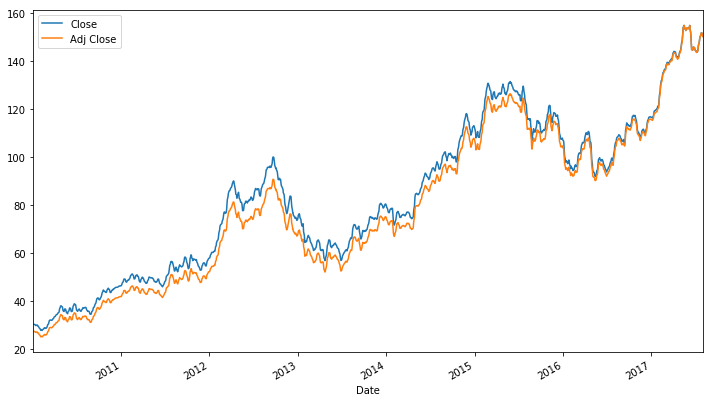

In [ ]:
aapl.rolling(5)[['Close', 'Adj Close']].mean().plot();

**My own example 83**

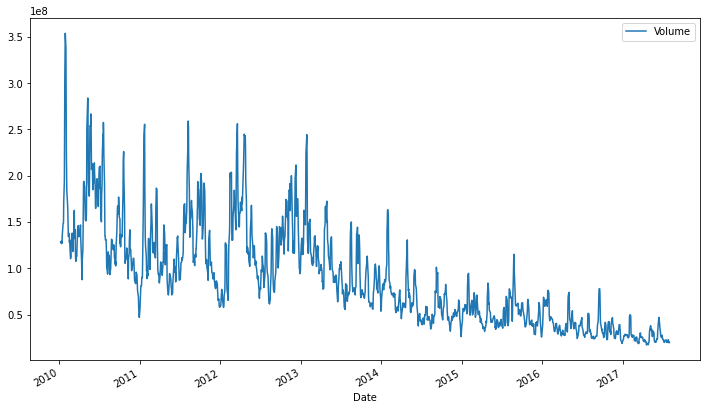

In [112]:
aapl.rolling(5)[[ 'Volume']].mean().plot();

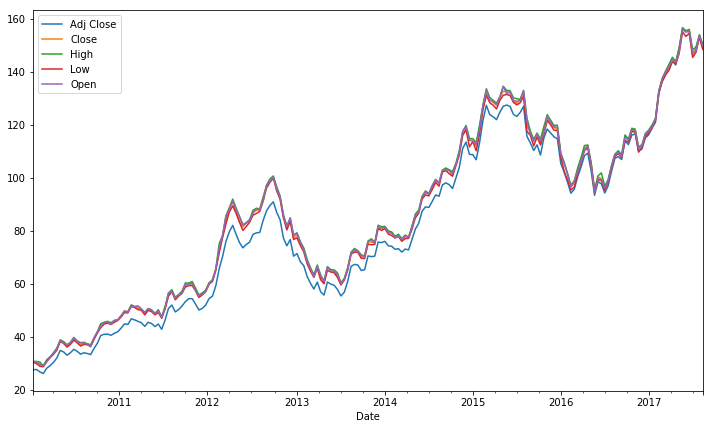

In [ ]:
# Drop `Volume`, since it's way bigger than everything else.
aapl.drop('Volume', axis=1).resample('2W').max().plot();

**My own example 84**

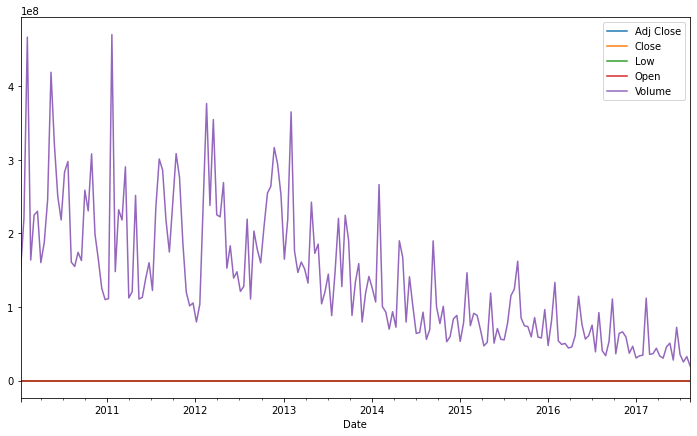

In [116]:
aapl.drop('High', axis=1).resample('2W').max().plot();

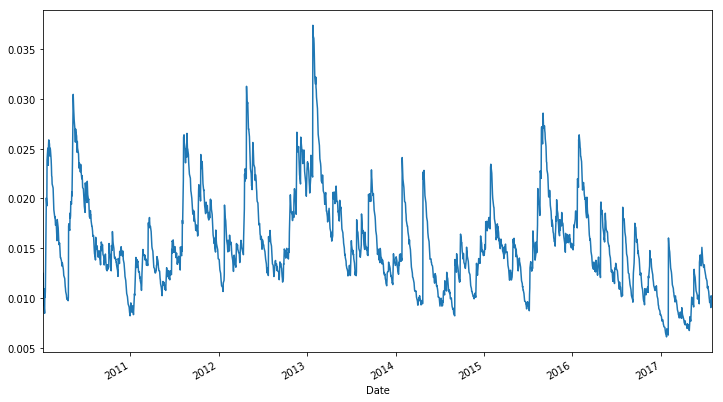

In [ ]:
# 30-day rolling exponentially-weighted stddev of returns.
aapl['Close'].pct_change().ewm(span=30).std().plot();

**My own example 85**

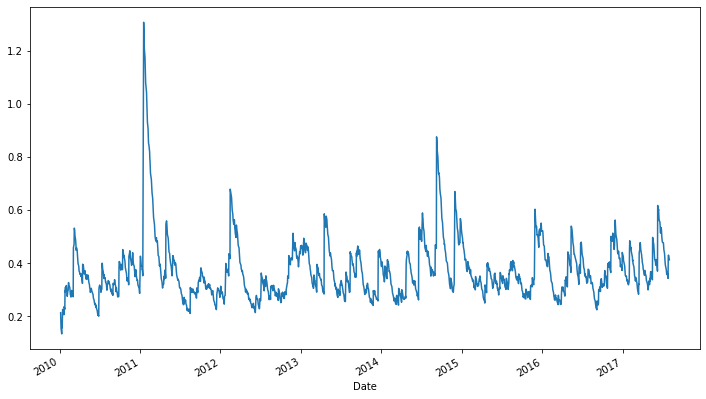

In [117]:

aapl['Volume'].pct_change().ewm(span=30).std().plot();

# "Real World" Data

In [120]:
from avocados import read_avocadata

avocados = read_avocadata('2015', '2017')
avocados.head()

../avocados.py:55: FutureWarning: The default value of regex will change from True to False in a future version.
  frame['Region'] = frame['Region'].str.replace(' U.S.', '')


,Date,Region,Variety,Organic,Number of Stores,Weighted Avg Price,Low Price,High Price
0,2014-01-03 00:00:00+00:00,NATIONAL,HASS,False,9184,0.93,NaN,NaN
1,2014-01-03 00:00:00+00:00,NATIONAL,HASS,True,872,1.44,NaN,NaN
2,2014-01-03 00:00:00+00:00,NORTHEAST,HASS,False,1449,1.08,0.5,1.67
3,2014-01-03 00:00:00+00:00,NORTHEAST,HASS,True,66,1.54,1.5,2.00
4,2014-01-03 00:00:00+00:00,SOUTHEAST,HASS,False,2286,0.98,0.5,1.99


**My own example 86 Suscriptores con internet fijo**

In [122]:
!pip install sodapy

In [126]:
import pandas as pd
from sodapy import Socrata

# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
client = Socrata("www.datos.gov.co", None)

# Example authenticated client (needed for non-public datasets):
# client = Socrata(www.datos.gov.co,
#                  MyAppToken,
#                  userame="user@example.com",
#                  password="AFakePassword")

# First 2000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get("m3cu-ycaq", limit=2000)

# Convert to pandas DataFrame
results_df = pd.DataFrame.from_records(results)
results_df.head()

,a_o,trimestre,cod_departamento,departamento,cod_municipio,municipio,no_accesos_fijos_a_internet,poblaci_n_dane,indice
0,2021,2,68,SANTANDER,68160,CEPITA,7,2047,"0,0034"
1,2021,3,68,SANTANDER,68160,CEPITA,7,2047,"0,0034"
2,2021,1,68,SANTANDER,68160,CEPITA,7,2047,"0,0034"
3,2020,2,68,SANTANDER,68160,CEPITA,79,2025,"0,039"
4,2020,3,68,SANTANDER,68160,CEPITA,177,2025,"0,0874"


In [124]:
# Unlike numpy arrays, pandas DataFrames can have a different dtype for each column.
avocados.dtypes

Date                  datetime64[ns, UTC]
Region                             object
Variety                            object
Organic                              bool
Number of Stores                    int64
Weighted Avg Price                float64
Low Price                         float64
High Price                        float64
dtype: object

**My own example 87**

In [197]:
results_df['no_accesos_fijos_a_internet'] = results_df['no_accesos_fijos_a_internet'].astype(int)
results_df['poblaci_n_dane'] = results_df['poblaci_n_dane'].astype(int)
results_df['trimestre'] = results_df['trimestre'].astype(int)
results_df.dtypes

a_o                            object
trimestre                       int64
cod_departamento               object
departamento                   object
cod_municipio                  object
municipio                      object
no_accesos_fijos_a_internet     int64
poblaci_n_dane                  int64
indice                         object
dtype: object

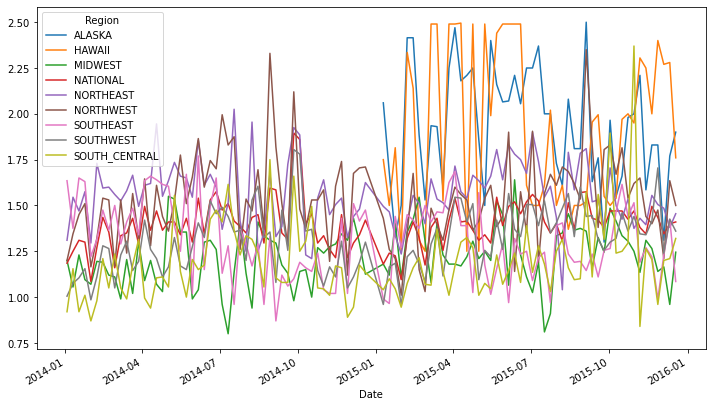

In [128]:
# What's the regional average price of a HASS avocado every day?
hass = avocados[avocados.Variety == 'HASS']
hass.groupby(['Date', 'Region'])['Weighted Avg Price'].mean().unstack().ffill().plot();

**My own example 88**

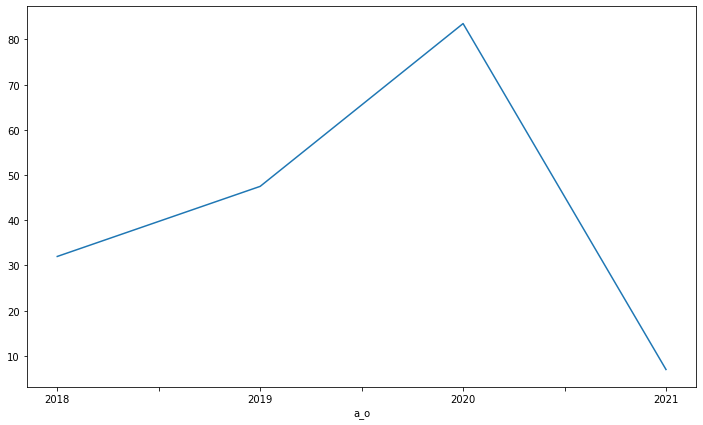

In [144]:

cepita = results_df[results_df.municipio == 'CEPITA']
cepita.groupby(['a_o'	])['no_accesos_fijos_a_internet'].mean().plot();

In [183]:
def _organic_spread(group):

    if len(group.columns) != 2:
        return pd.Series(index=group.index, data=0.0)
    
    is_organic = group.columns.get_level_values('Organic').values.astype(bool)
    organics = group.loc[:, is_organic].squeeze()
    non_organics = group.loc[:, ~is_organic].squeeze()
    diff = organics - non_organics
    return diff

def organic_spread_by_region(df):
    """What's the difference between the price of an organic 
    and non-organic avocado within each region?
    """
    return (
        df
        .set_index(['Date', 'Region', 'Organic'])
         ['Weighted Avg Price']
        .unstack(level=['Region', 'Organic'])
        .ffill()
        .groupby(level='Region', axis=1)
        .apply(_organic_spread)
    )

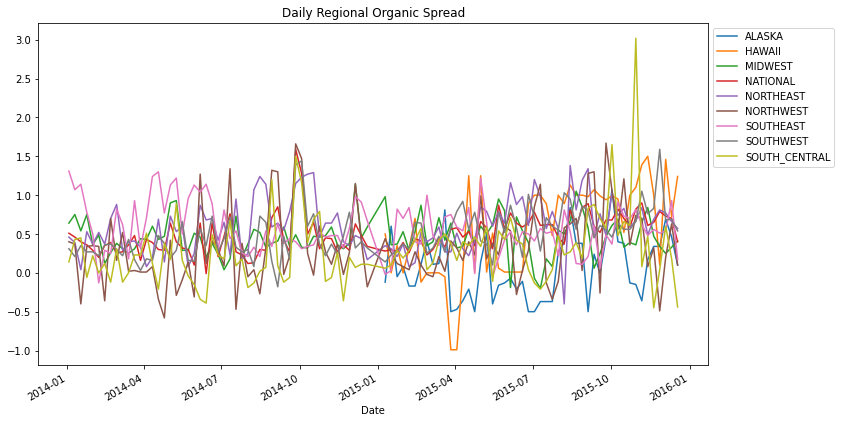

In [184]:
organic_spread_by_region(hass).plot();
plt.gca().set_title("Daily Regional Organic Spread");
plt.legend(bbox_to_anchor=(1, 1));

**My own example 89**

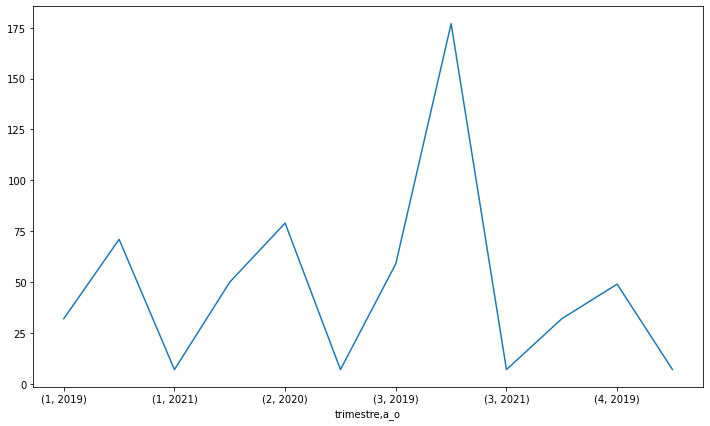

In [179]:
#import matplotlib.pyplot as plt
cepita = results_df[results_df.municipio == 'CEPITA']
cepita.groupby(['trimestre','a_o'	])['no_accesos_fijos_a_internet'].mean().plot();

In [185]:
spread_correlation = organic_spread_by_region(hass).corr()
spread_correlation

Region,ALASKA,HAWAII,MIDWEST,NATIONAL,NORTHEAST,NORTHWEST,SOUTHEAST,SOUTHWEST,SOUTH_CENTRAL
Region,,,,,,,,,
ALASKA,1.000000,0.202723,0.175251,0.007844,0.051049,0.087575,0.129079,-0.070868,0.161624
HAWAII,0.202723,1.000000,-0.021116,0.373914,0.247171,0.341155,0.019388,0.159192,0.092632
MIDWEST,0.175251,-0.021116,1.000000,0.062595,-0.010213,-0.043783,0.047437,-0.059128,0.068902
NATIONAL,0.007844,0.373914,0.062595,1.000000,0.502035,0.579102,-0.040539,0.635006,0.486524
NORTHEAST,0.051049,0.247171,-0.010213,0.502035,1.000000,0.242039,-0.236225,0.360389,0.149881
NORTHWEST,0.087575,0.341155,-0.043783,0.579102,0.242039,1.000000,-0.032306,0.165992,0.349935
SOUTHEAST,0.129079,0.019388,0.047437,-0.040539,-0.236225,-0.032306,1.000000,-0.167631,-0.021176
SOUTHWEST,-0.070868,0.159192,-0.059128,0.635006,0.360389,0.165992,-0.167631,1.000000,0.254504
SOUTH_CENTRAL,0.161624,0.092632,0.068902,0.486524,0.149881,0.349935,-0.021176,0.254504,1.000000


**My own example 90**

In [198]:
cepita['media'] = cepita.groupby(['trimestre'])['no_accesos_fijos_a_internet'].mean()
cepita.head()

,a_o,trimestre,cod_departamento,departamento,cod_municipio,municipio,no_accesos_fijos_a_internet,poblaci_n_dane,indice,media
0,2021,2,68,SANTANDER,68160,CEPITA,7,2047,"0,0034",NaN
1,2021,3,68,SANTANDER,68160,CEPITA,7,2047,"0,0034",36.666667
2,2021,1,68,SANTANDER,68160,CEPITA,7,2047,"0,0034",45.333333
3,2020,2,68,SANTANDER,68160,CEPITA,79,2025,"0,039",81.000000
4,2020,3,68,SANTANDER,68160,CEPITA,177,2025,"0,0874",29.333333


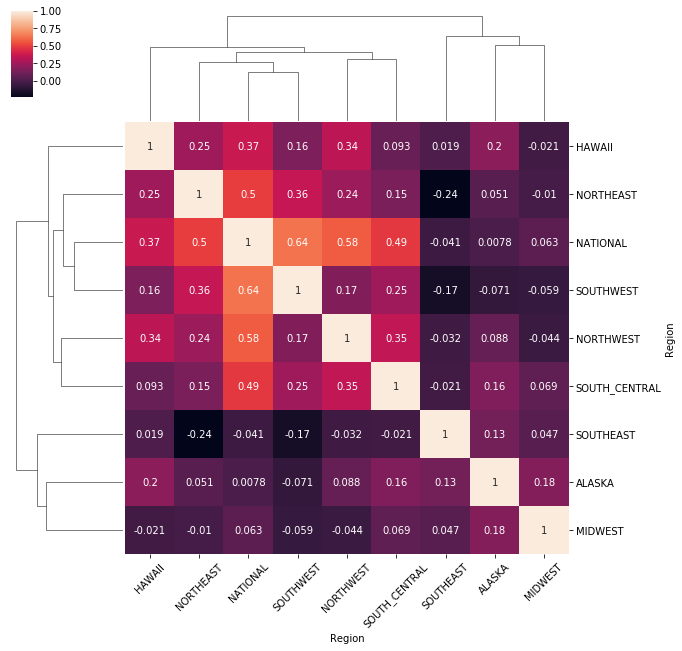

In [ ]:
import seaborn as sns
grid = sns.clustermap(spread_correlation, annot=True)
fig = grid.fig
axes = fig.axes
ax = axes[2]
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

# Pandas Review

- Pandas extends numpy with more complex datastructures and algorithms.
- If you understand numpy, you understand 90% of pandas.
- `groupby`, `set_index`, and `unstack` are powerful tools for working with categorical data.
- Avocado prices are surprisingly interesting :)

# Thanks!